<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/001dphi_hospital_patient_survival_d1e3aaeb68c74336a595ab526ff17f0e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")       #read train dataset

In [ ]:
train.head()      #to show first 5 rows

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


**Data Pre-Processing**

In [ ]:
train.shape         #to view shape

(23097, 18)

In [ ]:
train.info()              #details of each columns in train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
#to drop unimportant columns from train dataset 
train = train.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
def change(x):
    if x == 'NO':
        return 'NO'
    elif x=='YES' or x=='YESS':
        return 'YES'
    else:
        return 'CANNOT SAY'

In [ ]:
#to fill missing value with '0.0'
train['Number_of_prev_cond']=train['Number_of_prev_cond'].fillna(0.0)

In [ ]:
#to change categorical value 
train['Patient_Smoker'] = train['Patient_Smoker'].apply(change) 

In [ ]:
train.isna().sum().sum()    #to check missing value in entire train dataset

0

**On Test Set**

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")               #to read test dataset 

In [ ]:
test.head()         #to view first 5 rows 

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test.shape              #to view shape

(9303, 17)

In [ ]:
#to drop unnesscary column from test dataset 
test = test.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
test.info()               #to view each column details of test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       9303 non-null   int64  
 1   Patient_Age               9303 non-null   int64  
 2   Patient_Body_Mass_Index   9303 non-null   float64
 3   Patient_Smoker            9303 non-null   object 
 4   Patient_Rural_Urban       9303 non-null   object 
 5   Patient_mental_condition  9303 non-null   object 
 6   Number_of_prev_cond       9303 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 508.9+ KB


In [ ]:
#to change categorical value 
test['Patient_Smoker'] = test['Patient_Smoker'].apply(change)  

In [ ]:
test.isna().sum().sum()             # to check missing value in entire test dataset 

0

In [ ]:
test = pd.get_dummies(test)    #one-hot encoding 

**Spliting Data**

In [ ]:
#to split data in independent variable and target variable
X = train.drop(['Survived_1_year'],axis=1)
y = train['Survived_1_year']

In [ ]:
X = pd.get_dummies(X)      #one-hot encoding to X data 

In [ ]:
#to split entire train into X_train , X_test , y_train , y_test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

In [ ]:
#to view shape of each dataset 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18477, 10)
(4620, 10)
(18477,)
(4620,)


In [ ]:
X.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_CANNOT SAY,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,8,56,18.479385,2.0,0,0,1,0,1,1
1,5,36,22.945566,1.0,0,0,1,1,0,1
2,23,48,27.510027,1.0,0,0,1,1,0,1
3,51,5,19.130976,1.0,0,1,0,0,1,1
4,0,128,1.348400,1.0,1,0,0,1,0,1


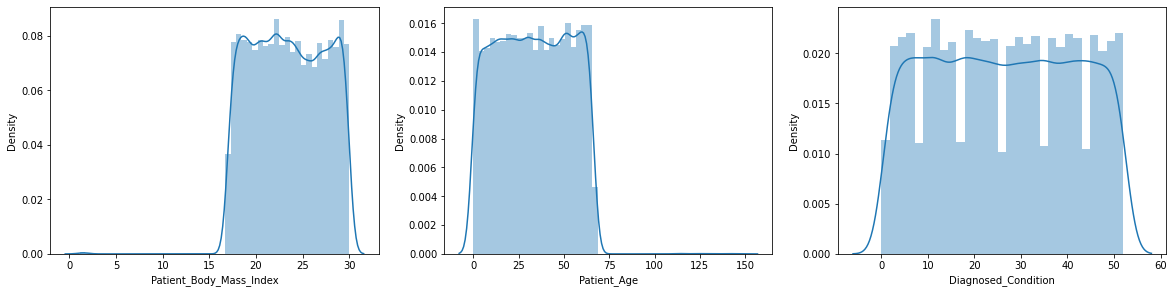

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.distplot(X['Patient_Body_Mass_Index'])

plt.subplot(232)
sns.distplot(X['Patient_Age'])

plt.subplot(233)
sns.distplot(X['Diagnosed_Condition'])

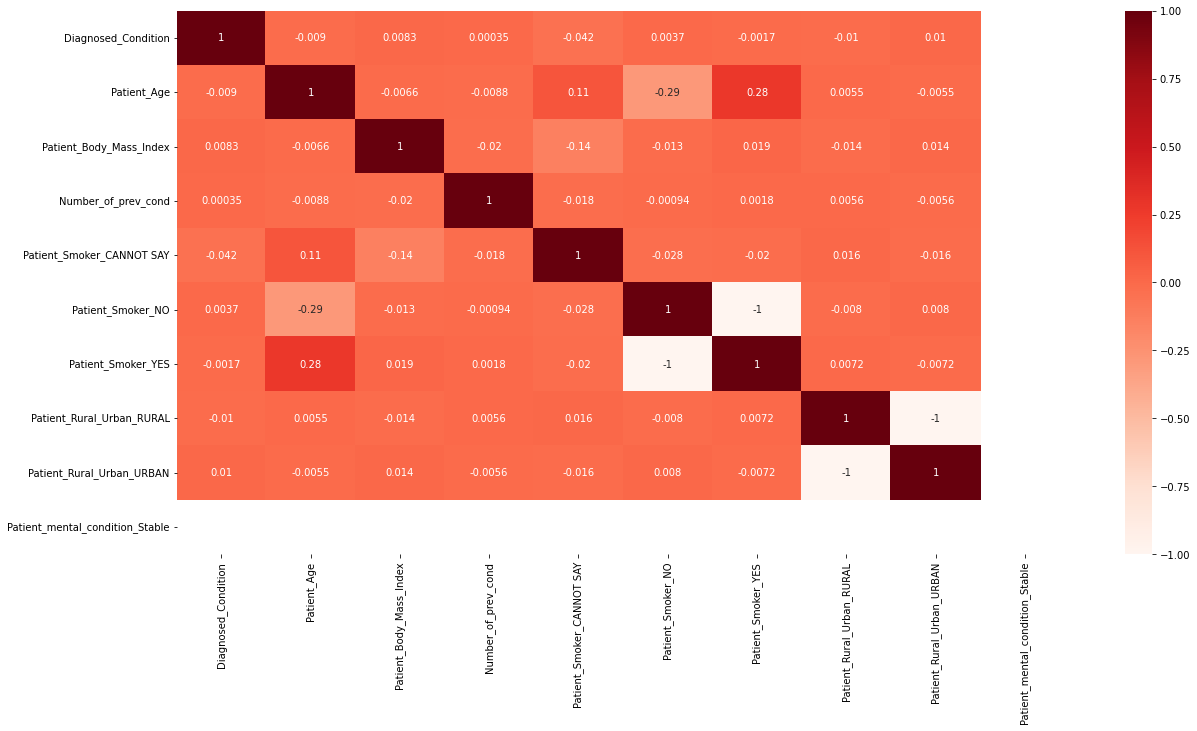

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True,cmap='Reds')

**Build Model**

In [ ]:
#use RandomForestClassifier model
model = RandomForestClassifier(n_estimators=200,oob_score=True,n_jobs=-1,max_features=None,min_samples_leaf=23)

In [ ]:
#fit the model
model.fit(X_train,y_train)

In [ ]:
#predict on X_test 
y_pred=model.predict(X_test)
y_pred

In [ ]:
#apply f1_score on actual set and predict set 
f1_score(y_test,y_pred)

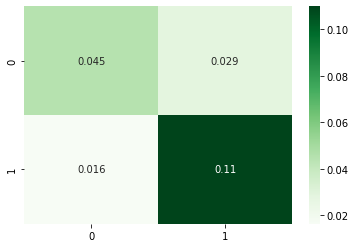

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(y), cmap='Greens', annot=True)

**prediction on test dataset**

In [ ]:
predictions = model.predict(test)

ValueError: ignored

In [ ]:
res = pd.DataFrame(predictions) 
res.index = test.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)   